In [2]:
# jupyter notebook 同时输出多行
import import_ipynb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## for data
import pandas as pd
import numpy as np
import random

## for plotting
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from pyecharts.charts import Bar, Line
from pyecharts import options as opts

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support

#jupyter notebook绘图设置
%matplotlib inline

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 不要发出警告
import warnings
warnings.filterwarnings('ignore') 
# 在画图的代码后面加上分号 ; 也可以不发出警告

In [2]:
## 读取数据
df = pd.read_excel('raw_data/腹泻病个案信息一览2017-2018.xlsx',
                   sheet_name=0,
                   engine='openpyxl')
print(df.shape)

df["性别"] = df["性别"].map(lambda x: x.strip())
df["性别"] = df["性别"].map(lambda x: "Male" if x =="男" or x=="男性" else "Female")
df.head()

(38168, 107)


,区县,医院,病例编号,初(复)诊,性别,出生年月,age,户籍,省,详细地址,...,细菌检测结果初次录入时间,细菌检测结果修订时间,样本接收时间(细菌),病毒结果,Lab备注,病毒检测结果初次录入时间,病毒检测结果修订时间,样本接收时间(病毒),Unnamed: 105,Unnamed: 106
0,闵行区,上海市第五人民医院,11201201700611,NaN,Male,1988-10,28,本市外来（含港澳台）,上海市,上海市奉贤区金汇镇,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,闵行区,上海市第五人民医院,11201201700614,NaN,Male,1958-02,59,本市外来（含港澳台）,上海市,上海市金山区亭林镇,...,2017-08-10,2017-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,闵行区,上海市第五人民医院,11201201700620,NaN,Female,1954-07,63,本市常住,上海市,上海市闵行区江川路街道,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,闵行区,上海市第五人民医院,11201201700668,NaN,Male,1935-11,81,本市常住,上海市,上海市闵行区江川路街道,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,闵行区,上海市第五人民医院,11201201700703,NaN,Female,1968-03,49,本市常住,上海市,上海市闵行区江川路街道,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 数据预处理

In [3]:
columns = []
## 显示缺失字段的比例
print("\n字段数据缺失比例")
for col in df.columns:
    ratio = df[col].isnull().sum()/len(df)*100
    print(f"{col:25s} {ratio:3.0f} %")
    # 把缺失比例为 98% 的列删除
    if ratio >= 98:
        pass
    else:
        columns.append(col)

print("\n更新后字段数据缺失比例")
df = df[columns]
for col in df.columns:
    ratio = df[col].isnull().sum()/len(df)*100
    print(f"{col:25s} {ratio:3.0f} %")


字段数据缺失比例
区县                          0 %
医院                          0 %
病例编号                        0 %
初(复)诊                      43 %
性别                          0 %
出生年月                        0 %
age                         0 %
户籍                          0 %
省                           1 %
详细地址                       14 %
职业                          0 %
就诊日期                        0 %
就诊日期1                       0 %
发病日期                        0 %
首发症状                       17 %
其他首发症状                    100 %
发热                          0 %
体温                         83 %
脱水                          0 %
脉搏                         99 %
收缩压                        99 %
舒张压                        99 %
腹胀                          0 %
恶心                          0 %
里急后重                        0 %
肠鸣音亢进                       0 %
腹痛                          0 %
腹痛性质                       48 %
腹痛部位                       48 %
呕吐                          0 %
呕吐频次                       76 

## 提取所需列

In [4]:
# 把所需要的列提取出来 
X = ["区县","性别","age","户籍", "职业", "首发症状", "发热","体温","脱水",
     "腹胀","恶心","里急后重","肠鸣音亢进","腹痛","腹痛性质","腹痛部位","呕吐","呕吐频次","呕吐在腹泻___发生","持续天数",
     "腹泻","腹泻量","腹泻频次","腹泻天数","腹泻性质","神经症状","中毒症状","其他症状","近6个月有无肠道疾病既往史",
    "发病前五天内是否有不洁饮食史","进餐地点","发病前5天内是否有不洁饮水史","发病前5天内周边有无类似腹泻病例","疑似病例人数",
    "发病前5天内是否有聚餐史","发病前一周是否外出","是否家中饲养或接触过宠物","就诊前是否服用过抗生素",
    "诊断","诊断类型","临床处理","本次就诊是否给予抗生素","抗生素名称.1","是否采集","采样类型"]
y = ["细菌结果"]
data = df[X + y]


# 把提取出来的数据存入新的 `tsv` 文件
data_file = "data\腹泻_new.tsv"
data.to_csv(data_file, sep="\t", encoding="utf-8")

In [5]:
# 读取文件
data_file = "data\腹泻_new.tsv"
df = pd.read_csv(data_file, sep="\t", index_col=0, encoding="utf-8")
df.head()

,区县,性别,age,户籍,职业,首发症状,发热,体温,脱水,腹胀,...,是否家中饲养或接触过宠物,就诊前是否服用过抗生素,诊断,诊断类型,临床处理,本次就诊是否给予抗生素,抗生素名称.1,是否采集,采样类型,细菌结果
0,闵行区,Male,28,本市外来（含港澳台）,干部职员,腹泻,有,37.0,无,有,...,否,否,慢性肠胃炎,临床诊断,NaN,是,其他(阿米卡星),是,食源性采样,NaN
1,闵行区,Male,59,本市外来（含港澳台）,医务人员,"腹痛,腹泻",无,NaN,无,有,...,否,否,胃肠炎,实验室诊断,NaN,否,NaN,是,食源性采样,"其他弯曲菌,小肠结肠耶尔森菌"
2,闵行区,Female,63,本市常住,离退人员,腹泻,无,NaN,无,无,...,否,否,急性胃肠炎,临床诊断,口服用药,否,NaN,否,未采样,NaN
3,闵行区,Male,81,本市常住,离退人员,腹泻,无,37.0,无,无,...,否,否,急性胃肠炎,临床诊断,口服用药,是,诺氟沙星,否,未采样,NaN
4,闵行区,Female,49,本市常住,干部职员,腹泻,无,NaN,无,无,...,否,否,急性胃肠炎,临床诊断,口服用药,否,NaN,是,腹泻病采样,NaN


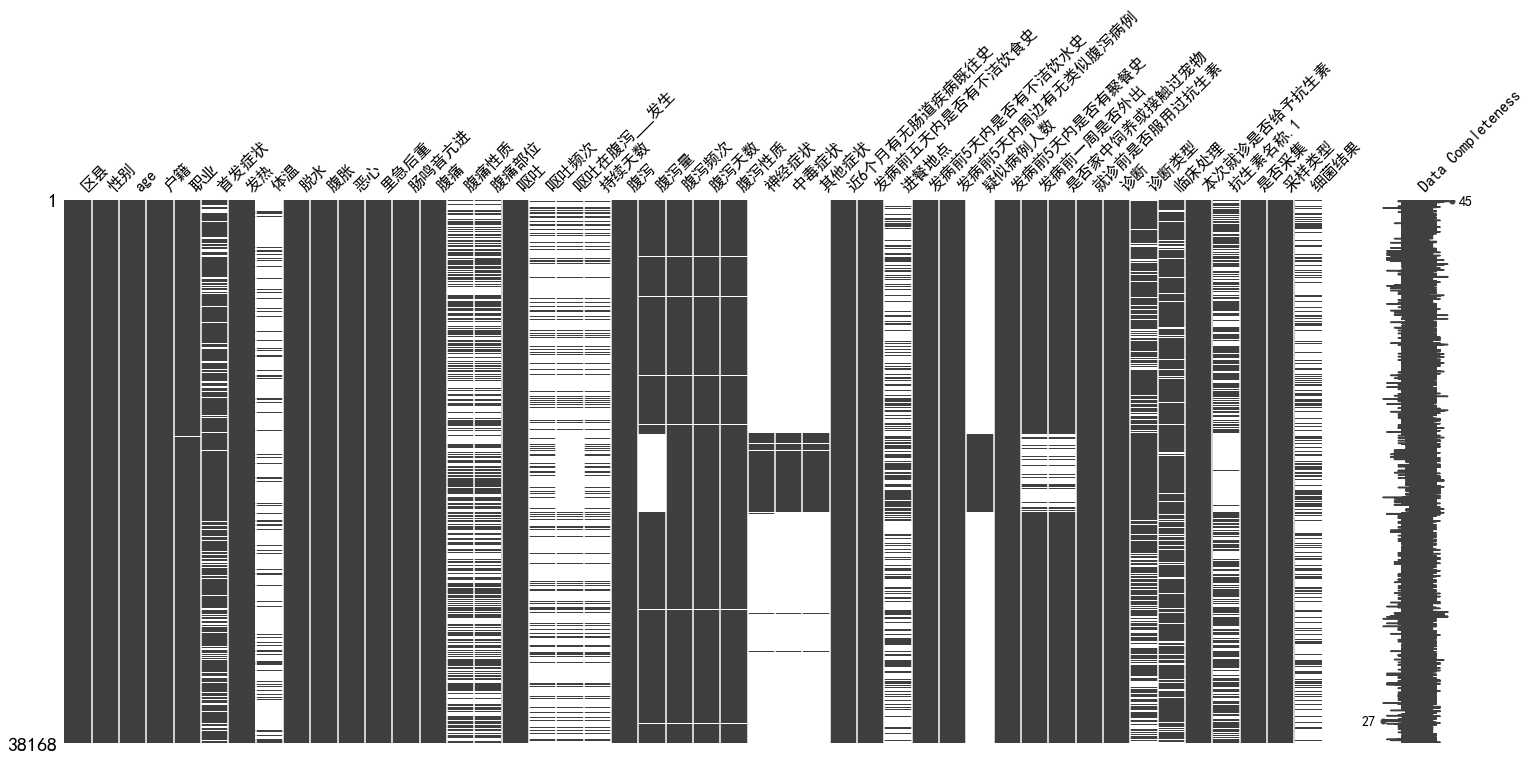

In [6]:
# 可视化查询缺失值
p = msno.matrix(df,figsize=(25,10),labels=True)
p.figure.savefig('D:\Dropbox\论文\图片\missing_data.pdf',bbox_inches = 'tight')

## 性别分布和年龄分布

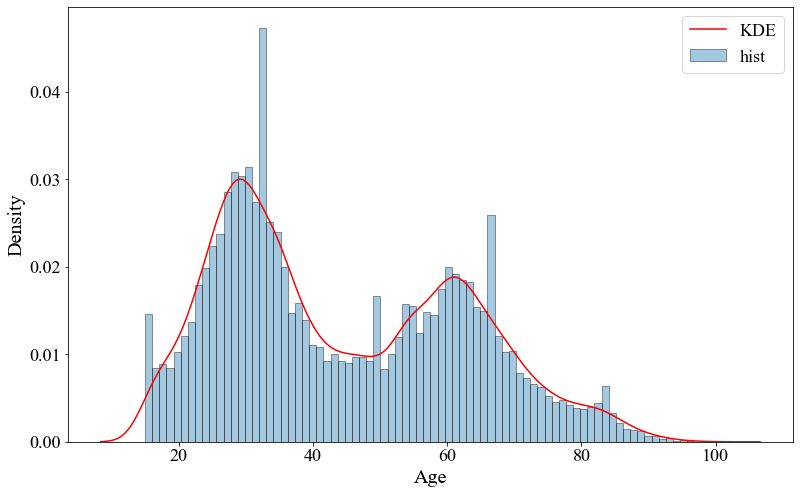

In [7]:
## 直方图查看患者年龄分布
plt.figure(figsize=(13, 8))
x = "age"


p = sns.distplot(df[x], bins=80,hist_kws={'label':'hist', 'edgecolor': 'black'},
                     kde_kws={'color':'red','label':'KDE'},
                 );

#设置图例并且设置图例的字体及大小
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 18,
}
p.legend(prop=font1,loc='best')

#设置坐标刻度值的大小以及刻度值的字体
p.tick_params(labelsize=18)
labels = p.get_xticklabels() + p.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}
p.set_xlabel('Age',font2)
p.set_ylabel('Density',font2)
p.figure.savefig('D:/Dropbox/论文/图片/age.pdf',bbox_inches = 'tight');

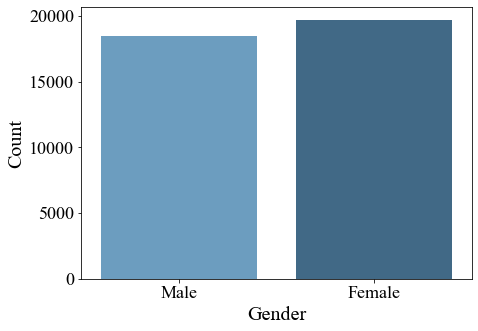

In [8]:
plt.figure(figsize=(7, 5))
p = sns.countplot(x="性别", data=df,palette="Blues_d")

#设置坐标刻度值的大小以及刻度值的字体
p.tick_params(labelsize=18)
labels = p.get_xticklabels() + p.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}
# p.set_xticklabels(['Male','Female'])
p.set_xlabel('Gender',font2)
p.set_ylabel('Count',font2)
p.figure.savefig('D:/Dropbox/论文/图片/sex.pdf',bbox_inches = 'tight');

## 缺失值填充
1. 以"细菌结果"为例，先删除"细菌结果"列为空值的行
2. 对其他列进行缺失值填充：连续数据，分类数据

### 连续数据

In [9]:
## 删除"细菌结果"列为空值的行
df.dropna(axis=0, how='any',subset=['细菌结果'], inplace=True)
print(df.shape)

## 缺失值填充
# 1. 连续数据类 --> 均值、众数
# int/flaot：age，体温，呕吐频次，持续天数，腹泻量，腹泻频次，腹泻天数，疑似病例人数
df["age"].fillna(df["age"].mean(), inplace=True)
df["体温"].fillna(df["体温"].mode()[0], inplace=True)

# "呕吐频次" 与前一列 "呕吐" 的值相关：
# 如果 "呕吐"="无" --> "呕吐频次"=0; 
df.loc[df['呕吐']=="无", '呕吐频次'] = 0
print("呕吐频次列缺失数-填充前", df['呕吐频次'].isnull().sum())
# 如果 "呕吐"="有"且 "呕吐频次" 为空值--> "呕吐频次"=1
df['呕吐频次'].fillna(1, inplace=True)
print("呕吐频次列缺失数-填充后", df['呕吐频次'].isnull().sum()) 

(11600, 46)
呕吐频次列缺失数-填充前 0
呕吐频次列缺失数-填充后 0


In [10]:
# “持续天数” 也是和 "呕吐"列有关
# 如果 "呕吐"="无" --> "持续天数"=0; 
df.loc[df['呕吐']=="无", '持续天数'] = 0
print("持续天数列缺失数-填充前", df['持续天数'].isnull().sum())
# 如果 "呕吐"="有"且 "持续天数" 为空值--> "持续天数"=1
df['持续天数'].fillna(1, inplace=True)
print("持续天数列缺失数-填充后", df['持续天数'].isnull().sum())

持续天数列缺失数-填充前 2
持续天数列缺失数-填充后 0


In [11]:
# "腹泻量","腹泻频次","腹泻天数" 都和 "腹泻"栏的值相关
# 如果 "腹泻" == "无"，则前三列都为 0
columns = ["腹泻量","腹泻频次","腹泻天数"]
for column in columns:  
    df.loc[df['腹泻']=="无", column] = 0
    print(f"{column}缺失数-填充前", df[column].isnull().sum())
    # 如果 "腹泻" == "有"且 "腹泻量"为空值，腹泻量用均值填充
    df[column].fillna(df[column].mean(), inplace=True)
    print(f"{column}缺失数-填充后", df[column].isnull().sum())

腹泻量缺失数-填充前 2661
腹泻量缺失数-填充后 0
腹泻频次缺失数-填充前 0
腹泻频次缺失数-填充后 0
腹泻天数缺失数-填充前 3
腹泻天数缺失数-填充后 0


In [12]:
# "疑似病例人数" 与前一列 "发病前5天内周边有无类似腹泻病例" 的值相关
# 先把 "发病前5天内周边有无类似腹泻病例" 列的值处理一下：否 无 是 有
def yes_no(x):
    """
    统一说法:
    否 无 --> 无
    是 有 --> 有
    """
    if x=="否" or x=="无":
        return "无"
    else:
        return "有"
df['发病前5天内周边有无类似腹泻病例'] = df['发病前5天内周边有无类似腹泻病例'].map(yes_no)

# 如果 "发病前5天内周边有无类似腹泻病例"="无" --> "疑似病例人数"=0; 
df.loc[df['发病前5天内周边有无类似腹泻病例']=="无", '疑似病例人数'] = 0
print("疑似病例人数列缺失数-填充前", df['疑似病例人数'].isnull().sum())
# 如果 "发病前5天内周边有无类似腹泻病例"="有"且 "持续天数" 为空值--> "疑似病例人数"=1
df['疑似病例人数'].fillna(1, inplace=True)
print("疑似病例人数列缺失数-填充后", df['疑似病例人数'].isnull().sum())

疑似病例人数列缺失数-填充前 0
疑似病例人数列缺失数-填充后 0


### 分类数据
**真值转换法**：当我们无法得知缺失值的分布规律，并且无法对于缺失值采用上述的补全方法时；或者我们认为数据缺失也是一种过滤，不应该轻易对缺失值随意处理，这时就可以用真值转换法。

该思路的根本观点是，我们承认缺失值的存在，并且把数据缺失也作为数据分布规律的一部分，将变量的实际值和缺失值都作为输入维度参与后续数据处理和模型计算中，但是变量的实际值可以作为变量值参与模型计算，而缺失值通常无法参与运算，因此需要对缺失值进行真值转换。

以用户性别字段为例，很多数据库集都无法对会员的性别进行补足，但又舍不得将其丢弃掉，那么我们将选择将其中的值，包括男、女、未知从一个变量的多个值分布状态转换为多个变量的真值分布状态。

转换前：性别（值域：男、女、未知）。

转换后：性别_男（值域 1 或 0）、性别_女（值域 1 或 0）、性别_未知（值域 1 或 0）。

然后将这 3 列新的字段作为输入维度替换原来的 1 个字段参与后续模型计算。

In [13]:
# 职业, 首发症状，腹痛性质，腹痛部位，呕吐在腹泻___发生，神经症状，中毒症状，其他症状，食品名称，食物分类，进餐地点
# 发病前一周是否外出，是否家中饲养或接触过宠物，诊断类型，临床处理，抗生素名称.1
# object 栏一般情况下如果没有写，默认为没有，用其他值也不好填
x = ["职业","首发症状","腹痛性质","腹痛部位","呕吐在腹泻___发生","神经症状","中毒症状","其他症状","进餐地点","发病前一周是否外出","是否家中饲养或接触过宠物","诊断类型","临床处理","抗生素名称.1"]
for column in x:
    df[column].fillna("无", inplace=True)
    
# 需要统一说法的 column：否 无 是 有
x = ["发病前五天内是否有不洁饮食史","发病前5天内是否有不洁饮水史","发病前5天内周边有无类似腹泻病例",
    "发病前5天内是否有聚餐史","发病前一周是否外出","是否家中饲养或接触过宠物","就诊前是否服用过抗生素",
     "本次就诊是否给予抗生素","是否采集"]
for column in x:
    df[column] = df[column].map(yes_no)
    

In [14]:
# 检查每一列是否还有空值
for col in df.columns:
    ratio = df[col].isnull().sum()/len(df)*100
    print(f"{col:25s} {ratio:3.0f} %")

区县                          0 %
性别                          0 %
age                         0 %
户籍                          0 %
职业                          0 %
首发症状                        0 %
发热                          0 %
体温                          0 %
脱水                          0 %
腹胀                          0 %
恶心                          0 %
里急后重                        0 %
肠鸣音亢进                       0 %
腹痛                          0 %
腹痛性质                        0 %
腹痛部位                        0 %
呕吐                          0 %
呕吐频次                        0 %
呕吐在腹泻___发生                  0 %
持续天数                        0 %
腹泻                          0 %
腹泻量                         0 %
腹泻频次                        0 %
腹泻天数                        0 %
腹泻性质                        0 %
神经症状                        0 %
中毒症状                        0 %
其他症状                        0 %
近6个月有无肠道疾病既往史               0 %
发病前五天内是否有不洁饮食史              0 %
进餐地点                        0 %
发病前5天内是否

In [15]:
# 去除类型为 object 列的空格
obj = df.dtypes[df.dtypes == 'object'].index.tolist()
obj.remove("腹泻性质")
for column in obj:
    print(column)
    df[column] = df[column].astype('object')
    df[column] = df[column].map(lambda x: x.strip())

区县
性别
户籍
职业
首发症状
发热
脱水
腹胀
恶心
里急后重
肠鸣音亢进
腹痛
腹痛性质
腹痛部位
呕吐
呕吐在腹泻___发生
腹泻
神经症状
中毒症状
其他症状
近6个月有无肠道疾病既往史
发病前五天内是否有不洁饮食史
进餐地点
发病前5天内是否有不洁饮水史
发病前5天内周边有无类似腹泻病例
发病前5天内是否有聚餐史
发病前一周是否外出
是否家中饲养或接触过宠物
就诊前是否服用过抗生素
诊断
诊断类型
临床处理
本次就诊是否给予抗生素
抗生素名称.1
是否采集
采样类型
细菌结果


In [16]:
# 把缺失值填充完成后的数据存入新的 `tsv` 文件
df_file = "data/fuxie_fillna.tsv"
df.to_csv(df_file, sep="\t", encoding="utf-8")

## 结果概览

后续可以直接从这一模块开始运行。

In [3]:
# 读取文件
df_file = "data/fuxie_fillna.tsv"
df = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")
df.columns
df.shape

Index(['区县', '性别', 'age', '户籍', '职业', '首发症状', '发热', '体温', '脱水', '腹胀', '恶心',
       '里急后重', '肠鸣音亢进', '腹痛', '腹痛性质', '腹痛部位', '呕吐', '呕吐频次', '呕吐在腹泻___发生',
       '持续天数', '腹泻', '腹泻量', '腹泻频次', '腹泻天数', '腹泻性质', '神经症状', '中毒症状', '其他症状',
       '近6个月有无肠道疾病既往史', '发病前五天内是否有不洁饮食史', '进餐地点', '发病前5天内是否有不洁饮水史',
       '发病前5天内周边有无类似腹泻病例', '疑似病例人数', '发病前5天内是否有聚餐史', '发病前一周是否外出',
       '是否家中饲养或接触过宠物', '就诊前是否服用过抗生素', '诊断', '诊断类型', '临床处理', '本次就诊是否给予抗生素',
       '抗生素名称.1', '是否采集', '采样类型', '细菌结果'],
      dtype='object')

(11600, 46)

In [4]:
y = "细菌结果"
# 把细菌结果分为两类：阴性和阳性
df[y] = df[y].map(lambda x: 0 if x == "阴性" else 1)

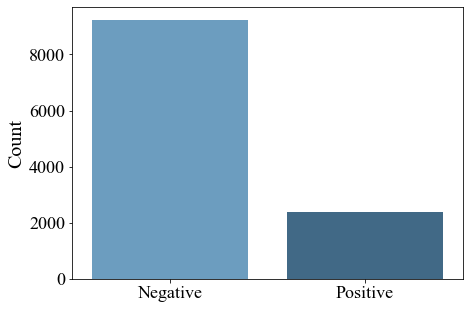

In [5]:
plt.figure(figsize=(7, 5))
p = sns.countplot(x="细菌结果", data=df,palette="Blues_d")

#设置坐标刻度值的大小以及刻度值的字体
p.tick_params(labelsize=18)
labels = p.get_xticklabels() + p.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}
p.set_xticklabels(['Negative','Positive'])
p.set_xlabel('',font2)
# p.set_xlabel('Bacterial infection results',font2)
p.set_ylabel('Count',font2)
p.figure.savefig('D:/Dropbox/论文/图片/label_dist.pdf',bbox_inches = 'tight');

## 特征选择
特征选择是特征工程中重要的一环，其主要目的是从所有特征中选出相关特征 (relevant feature)，或者说在不引起重要信息丢失的前提下去除掉无关特征 (irrelevant feature)或冗余特征 (redundant feature)。进行特征选择的好处主要有以下几种：
1. 降低过拟合风险，提升模型效果
2. 提高训练速度，降低运算开销
3. 更少的特征通常意味着更好的可解释性

### 基于强化学习的特征选择


In [65]:
df_file = "data/fuxie_fillna.tsv"
df = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")
y = "细菌结果"
# 把细菌结果分为两类：阴性和阳性
df[y] = df[y].map(lambda x: 0 if x == "阴性" else 1)
df.head()

,区县,性别,age,户籍,职业,首发症状,发热,体温,脱水,腹胀,...,是否家中饲养或接触过宠物,就诊前是否服用过抗生素,诊断,诊断类型,临床处理,本次就诊是否给予抗生素,抗生素名称.1,是否采集,采样类型,细菌结果
1,闵行区,Male,59,本市外来（含港澳台）,医务人员,"腹痛,腹泻",无,38.0,无,有,...,无,无,胃肠炎,实验室诊断,无,无,无,有,食源性采样,1
8,闵行区,Female,36,本市常住,商业服务,"腹痛,腹泻",无,37.0,无,无,...,无,无,急性胃肠炎,临床诊断,口服用药,有,头孢夫辛,有,食源性采样,0
9,闵行区,Female,36,本市常住,工人,腹泻,无,38.0,无,无,...,无,无,肠功能紊乱,临床诊断,口服用药,无,无,有,食源性采样,1
11,闵行区,Female,27,本市常住,不详,无,无,38.0,无,无,...,无,无,肠道功能紊乱,无,口服用药,有,其他(黄连素),有,腹泻病采样,0
12,闵行区,Female,77,本市常住,离退人员,腹泻,无,37.0,无,无,...,无,无,肠功能紊乱,临床诊断,口服用药,无,无,有,食源性采样,0


以下三种编码方式任选一种运行。

#### 分类数据编码：one-hot

In [28]:
# 丢弃第一列以避免线性相关
df = pd.get_dummies(df,drop_first=True)
df.head()
# 由结果知道最后有 382 个特征 (排除细菌结果)

,age,体温,呕吐频次,持续天数,腹泻量,腹泻频次,腹泻天数,疑似病例人数,细菌结果,区县_奉贤区,...,是否采集_有,采样类型_未采样,采样类型_未采样 平行样采样,采样类型_腹泻病采样,采样类型_腹泻病采样 平行样采样,"采样类型_腹泻病采样,其他采样","采样类型_腹泻病采样,平行样采样","采样类型_腹泻病采样,平行样采样,其他采样",采样类型_食源性采样,"采样类型_食源性采样,其他采样"
1,59,38.0,0.0,0.0,2.0,5.0,2.0,0.0,1,0,...,1,0,0,0,0,0,0,0,1,0
8,36,37.0,0.0,0.0,3.0,3.0,1.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,36,38.0,0.0,0.0,2.0,3.0,2.0,0.0,1,0,...,1,0,0,0,0,0,0,0,1,0
11,27,38.0,0.0,0.0,2.0,2.0,3.0,0.0,0,0,...,1,0,0,1,0,0,0,0,0,0
12,77,37.0,0.0,0.0,2.0,3.0,2.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0


#### 如果使用特征嵌入

In [15]:
## ---------如果使用特征嵌入-------------
df_file = "data/fuxie_fillna_embed.tsv"
df = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")

#### 独热编码 + 特征嵌入

In [66]:
## ---------如果使用独热编码 + 特征嵌入-------------
# 仅选择所有的类别向量，因为连续向量在 embedding 文件中有
df1 = df[df.dtypes[df.dtypes == 'object'].index]
df1 = pd.get_dummies(df1, drop_first=True)
df1 = df1.reset_index(drop=True)
print("One-hot encoding dim:",df1.shape)

df_file = "data/fuxie_fillna_embed.tsv"
df2 = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")
print("feature embedding dim:",df2.shape)
df = pd.concat([df1, df2], axis=1)
print("final dim:",df.shape)
print("final feature dim:",df.drop("细菌结果",axis=1).shape)

One-hot encoding dim: (11600, 374)
feature embedding dim: (11600, 220)
final dim: (11600, 594)
final feature dim: (11600, 593)


#### 特征归一化

In [67]:
y = '细菌结果'
names = df.columns
scaler = preprocessing.MinMaxScaler().fit(df)
df = scaler.transform(df)
df= pd.DataFrame(df, columns=names)
df

# 把归一化后的结果存入新的文件
df_normal_file = "data/fuxie_fillna_normal.tsv"
df.to_csv(df_normal_file, sep="\t", encoding="utf-8")

# 把特征的名称按顺序存入 features_raw
features_raw = df.drop(y,axis=1).columns.to_list()
features_raw

,区县_奉贤区,区县_宝山区,区县_崇明区,区县_徐汇区,区县_普陀区,区县_杨浦区,区县_松江区,区县_浦东新区,区县_虹口区,区县_金山区,...,采样类型_dim4,age,体温,呕吐频次,持续天数,腹泻量,腹泻频次,腹泻天数,疑似病例人数,细菌结果
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.971133,0.517647,0.476190,0.0,0.0,0.666667,0.061728,0.022222,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.971133,0.247059,0.238095,0.0,0.0,1.000000,0.037037,0.011111,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.971133,0.247059,0.476190,0.0,0.0,0.666667,0.037037,0.022222,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.141176,0.476190,0.0,0.0,0.666667,0.024691,0.033333,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.971133,0.729412,0.238095,0.0,0.0,0.666667,0.037037,0.022222,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.895572,0.529412,0.476190,0.0,0.0,0.666667,0.098765,0.011111,0.0,1.0
11596,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.895572,0.211765,0.476190,0.0,0.0,0.666667,0.123457,0.011111,0.0,0.0
11597,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.971133,0.235294,0.666667,0.0,0.0,0.666667,0.111111,0.011111,0.0,1.0
11598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.635294,0.476190,0.0,0.0,0.666667,0.049383,0.011111,0.0,1.0


['区县_奉贤区',
 '区县_宝山区',
 '区县_崇明区',
 '区县_徐汇区',
 '区县_普陀区',
 '区县_杨浦区',
 '区县_松江区',
 '区县_浦东新区',
 '区县_虹口区',
 '区县_金山区',
 '区县_长宁区',
 '区县_闵行区',
 '区县_闸北区',
 '区县_青浦区',
 '区县_静安区',
 '区县_黄浦区',
 '性别_Male',
 '户籍_本市外来（含港澳台）',
 '户籍_本市常住',
 '户籍_流动人口',
 '户籍_流动人口（含港澳台）',
 '职业_中小学生',
 '职业_保育员及保姆',
 '职业_公共场所服务员',
 '职业_其他',
 '职业_其他学生',
 '职业_农民',
 '职业_医务人员',
 '职业_商业服务',
 '职业_学生',
 '职业_家务及待业',
 '职业_工人',
 '职业_干部职员',
 '职业_教师',
 '职业_散居儿童',
 '职业_无',
 '职业_民工',
 '职业_海员及长途驾驶员',
 '职业_渔(船)民',
 '职业_渔（船）民',
 '职业_离退人员',
 '职业_餐饮食品业',
 '首发症状_发热',
 '首发症状_发热,腹泻',
 '首发症状_发热,腹泻,呕吐',
 '首发症状_发热,腹痛',
 '首发症状_发热,腹痛,呕吐',
 '首发症状_发热,腹痛,腹泻',
 '首发症状_发热,腹痛,腹泻,呕吐',
 '首发症状_呕吐',
 '首发症状_无',
 '首发症状_腹泻',
 '首发症状_腹泻,呕吐',
 '首发症状_腹痛',
 '首发症状_腹痛,呕吐',
 '首发症状_腹痛,腹泻',
 '首发症状_腹痛,腹泻,呕吐',
 '发热_有',
 '脱水_无',
 '脱水_轻度',
 '腹胀_有',
 '恶心_有',
 '里急后重_有',
 '肠鸣音亢进_有',
 '腹痛_有',
 '腹痛性质_无',
 '腹痛性质_阵发性',
 '腹痛部位_右上,右下',
 '腹痛部位_右上,脐周',
 '腹痛部位_右下',
 '腹痛部位_右下,脐周',
 '腹痛部位_左上',
 '腹痛部位_左上 右上',
 '腹痛部位_左上 右上 脐周',
 '腹痛部位_左上 右下',
 '腹痛部位_左上 左下',
 '腹痛部位_左上 左下 右上 右下',
 '腹痛部位_左上 左下 右上 右下 

In [68]:
len(features_raw)

593

#### 数据集划分：分层抽样

In [69]:
df_train, df_test = train_test_split(df,test_size=0.3, 
                     stratify=df[y], random_state=42)

## print info
print("X_train shape:", df_train.drop(y,axis=1).shape, "| X_test shape:", df_test.drop(y,axis=1).shape)
print("y_train mean:", round(np.mean(df_train[y]),2), "| y_test mean:", round(np.mean(df_test[y]),2))
print(df_train.shape[1], "features")


print('-'*50)

## 查看各个类别的比例
print("训练集：")
print(df_train[y].value_counts() / len(df_train[y]))
print("测试集：")
print(df_test[y].value_counts() / len(df_test[y]))

X_train shape: (8120, 593) | X_test shape: (3480, 593)
y_train mean: 0.2 | y_test mean: 0.2
594 features
--------------------------------------------------
训练集：
0.0    0.795813
1.0    0.204187
Name: 细菌结果, dtype: float64
测试集：
0.0    0.79569
1.0    0.20431
Name: 细菌结果, dtype: float64


In [70]:
X_train = df_train[features_raw]
y_train = df_train[y]

X_test = df_test[features_raw]
y_test = df_test[y]

In [71]:
# 根据列索引 -> 计算 F1 值
def accuracy(input):
    # x_train = X_train[input]
    x_train = X_train.iloc[:,input]
    x_test = X_test.iloc[:,input]
    clf = linear_model.LogisticRegression(class_weight='balanced')
    clf.fit(x_train, y_train.values.ravel())
    ### 下面这行代码有点问题，回来继续看看
    predicted = clf.predict(x_test)
    # 注意这里，beta > 1,表明 recall 比 presicion 重要
    # 而且我们只查看阳性样本的 f1 值，在医院样本中，这个值是更加重要的存在
    precision, recall, f1_beta, support = precision_recall_fscore_support(
        y_true=y_test, y_pred=predicted,beta=1.5)
    # 下面这行代码应该是计算的准确率吧
#     f1_score = clf.score(X_test, y_test)
    return f1_beta[1] 

QLearning 是强化学习算法中 value-based 的算法，Q 即为 Q（s,a）就是在某一时刻的 s 状态下 (s∈S)，采取 动作 a (a∈A) 动作能够获得收益的期望，环境会根据 agent 的动作反馈相应的回报 reward r，所以算法的主要思想就是将 State 与 Action 构建成一张 Q-table 来存储 Q 值，然后根据 Q 值来选取能够获得最大的收益的动作。

![image-20211008005052383](https://gitee.com/lockegogo/markdown_photo/raw/master/202110080050434.png)

In [72]:
# 初始化 Q-table，查看 X.shape，把这里的 30 替换成自己的特征总数
# Q_values = [[-1, -1]] * len(features_raw)
Q_values = [[-1, -1] for i in range(len(features_raw))] 
print("用 -1 初始化 Q-table：")
Q_values

### 如何给特征加上先验权重 (先运行“卡方检验和单因素方差分析”后再运行这段代码)
# 1. 拿到 df1 的 column 的列名, 或者 X_chi2_anova 的，这样没有 y 标签
# 2. 找到 df 中这些列名对应的下标 i
# 3. 将 Q_values 中 第 i 行的第 2 列设为 0 > 1

# for ix, column in enumerate(X_train.columns):
#     if column in X_chi2_anova.columns:
#         Q_values[ix][1] = 0
        
# print("给特征加上先验权重后的 Q-table：")
# Q_values

用 -1 初始化 Q-table：


[[-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],

In [73]:
X_train

,区县_奉贤区,区县_宝山区,区县_崇明区,区县_徐汇区,区县_普陀区,区县_杨浦区,区县_松江区,区县_浦东新区,区县_虹口区,区县_金山区,...,采样类型_dim3,采样类型_dim4,age,体温,呕吐频次,持续天数,腹泻量,腹泻频次,腹泻天数,疑似病例人数
9970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.737615,0.000000,0.117647,0.476190,0.0,0.0000,0.666667,0.061728,0.033333,0.0
1532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.577299,0.971133,0.764706,0.476190,0.0,0.0000,0.666667,0.049383,0.011111,0.0
7074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.577299,0.971133,0.294118,0.476190,0.1,0.0625,0.684044,0.123457,0.011111,0.0
10027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.577299,0.971133,0.129412,0.476190,0.1,0.0625,0.666667,0.074074,0.011111,0.0
6381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.737615,0.000000,0.529412,0.476190,0.0,0.0000,0.684044,0.037037,0.011111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.577299,0.971133,0.105882,0.476190,0.0,0.0000,0.684044,0.123457,0.011111,0.0
1626,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.737615,0.000000,0.364706,0.690476,0.0,0.0000,0.666667,0.061728,0.022222,0.0
6146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.577299,0.971133,0.247059,0.476190,0.0,0.0000,0.684044,0.037037,0.011111,0.0
3233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.577299,0.971133,0.058824,0.476190,0.0,0.0000,0.666667,0.111111,0.011111,0.0


Reward Function: s 是选出来的特征子集的个数，k 是允许的特征子集的最大个数。如果子集中的特征数量 s 大于指定的特征数量 k，我们会施加惩罚。

$$
\text { Reward }=\left\{\begin{array}{ll}
P, & \text { if, } s \leq k \\
P k / s, & \text { if }, s>k
\end{array}\right\}
$$

In [74]:
def get_reward(features):
    if len(features) == 0:
        return 0
    acc = accuracy(features) * 100
    tot_f = len(features)
    R = acc
    if tot_f > K:
        R = acc * K / tot_f
    return R

In [75]:
# epsilon-greedy
epsilon = 0.5
# alpha 是 Q-table 更新公式中的系数
alpha = 0.2

# 下面两个参数让它们衰减
epsilon_decay_rate = 0.995
alpha_decay_rate = 0.995

# 允许的最大特征数量: 200, 后期可以再调节
K = 400

In [76]:
all_rewards = []
num_episodes = 100

# 为每一个特征分配一个 agent
num_agents = len(features_raw)

# 字典，特征个数：global return
reward_store = {}
for i in range(num_agents + 1):
    reward_store[i] = 0


In [77]:
# 我们为每一个特征值分配了一个 agent，然后 agent可以有两个动作，0 代表不选择这个特征，1 代表选择这个特征
# 起初每个 agent 的选择都是 0
actions = [0] * num_agents

for episode in range(num_episodes):
    for agent in range(num_agents):
        rand_number = random.uniform(0, 1)
        # epsilon 贪心算法：1-epsilon 的概率选最优值，epsilon 的概率进行随机选择
        if rand_number > epsilon:
            #actions[agent]  = Q_values[agent].index(max(Q_values[agent]))
            actions[agent] = np.argmax(Q_values[agent])
        else:
            actions[agent] = random.choice([0, 1])
    features = []
    for i, act in enumerate(actions):
        if act == 1:
            # 这个 feature 里面存的是特征对应的编号
            features.append(i)
    print(features)
    R = get_reward(features)
    # 计算选择出来的 feature 的个数，比较新计算得到的值和个数对应的 return 的大小，把较大的那个存进去
    # 最后这个表中存的就是选择出来的不同的特征个数对应的准确率
    reward_store[len(features)] = max(reward_store[len(features)], R)
    print(R)
    # 把每个 epoch 得到的 return 存入 all_rewards
    all_rewards.append(R)

    for agent in range(num_agents):
        # 把第 agent 个动作取反，也就是说，如果这个特征之前没有选上，那我们这次就选上，保持其他的不变，这样做是为了消除噪声
        actions[agent] = 1 - actions[agent]
        features = []
        for i, act in enumerate(actions):
            if act == 1:
                features.append(i)
        # 这里可以看出 C_agent 的计算公式：C_i = G(a-a_i+c_i) - G(a)
        C_agent = get_reward(features) - R
        Q_values[agent][actions[agent]] = Q_values[agent][actions[agent]] + alpha * (C_agent - Q_values[agent][actions[agent]])
    alpha = alpha * alpha_decay_rate
    epsilon = epsilon * epsilon_decay_rate

[11, 14, 15, 21, 27, 28, 29, 30, 44, 48, 57, 59, 60, 62, 67, 74, 76, 77, 81, 85, 86, 90, 94, 95, 96, 97, 106, 115, 123, 126, 135, 137, 139, 143, 154, 159, 161, 162, 169, 171, 172, 173, 176, 177, 178, 186, 187, 193, 197, 203, 209, 212, 213, 215, 217, 221, 227, 229, 230, 233, 249, 251, 255, 257, 258, 260, 262, 264, 265, 266, 269, 273, 276, 279, 282, 284, 285, 286, 301, 302, 309, 311, 312, 313, 315, 319, 323, 331, 332, 339, 341, 344, 348, 358, 364, 375, 383, 390, 393, 394, 397, 400, 401, 402, 410, 412, 417, 428, 433, 437, 438, 440, 441, 442, 445, 449, 451, 456, 463, 467, 470, 473, 480, 481, 484, 486, 488, 489, 494, 498, 499, 501, 505, 506, 507, 513, 517, 518, 521, 522, 523, 526, 539, 540, 545, 548, 556, 557, 558, 562, 563, 568, 571, 589]
49.21922707842624
[0, 1, 2, 5, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 24, 25, 26, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 78, 79, 80, 81, 83, 84,

50.62505621009083
[0, 1, 2, 3, 4, 7, 8, 9, 10, 13, 15, 18, 19, 22, 23, 25, 26, 28, 30, 31, 33, 34, 37, 40, 44, 45, 46, 47, 49, 54, 56, 58, 63, 68, 69, 70, 71, 73, 75, 77, 78, 81, 82, 83, 85, 87, 88, 89, 92, 95, 99, 100, 101, 103, 105, 107, 109, 110, 112, 115, 117, 118, 123, 124, 126, 127, 128, 131, 132, 134, 138, 140, 141, 144, 146, 148, 151, 153, 154, 155, 156, 158, 159, 162, 163, 165, 166, 173, 176, 177, 178, 179, 182, 184, 186, 187, 188, 190, 191, 192, 198, 199, 200, 202, 203, 204, 206, 207, 208, 209, 210, 211, 214, 218, 222, 223, 224, 225, 226, 227, 230, 231, 235, 238, 241, 242, 245, 246, 247, 250, 252, 257, 259, 261, 262, 263, 266, 268, 271, 275, 278, 280, 281, 282, 283, 285, 286, 288, 291, 292, 294, 298, 299, 300, 302, 303, 305, 306, 307, 308, 309, 311, 315, 317, 322, 324, 325, 330, 331, 335, 340, 341, 344, 346, 347, 348, 350, 353, 356, 357, 358, 361, 362, 363, 364, 365, 366, 367, 371, 372, 374, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 394, 396, 398, 399, 401, 

50.738024087657344
[0, 2, 3, 6, 12, 13, 22, 23, 24, 25, 27, 28, 29, 32, 33, 36, 38, 39, 42, 46, 47, 49, 50, 52, 54, 56, 59, 62, 63, 64, 66, 67, 68, 69, 70, 71, 74, 76, 79, 82, 83, 85, 86, 87, 88, 90, 91, 92, 93, 97, 98, 100, 105, 107, 112, 113, 114, 115, 116, 118, 120, 121, 124, 125, 126, 127, 130, 133, 135, 136, 137, 138, 139, 143, 144, 145, 147, 148, 149, 150, 152, 153, 155, 156, 157, 158, 159, 162, 164, 165, 170, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 186, 187, 189, 194, 197, 198, 199, 200, 208, 209, 210, 212, 214, 215, 216, 217, 220, 221, 222, 224, 225, 226, 227, 229, 230, 232, 234, 236, 238, 239, 240, 241, 244, 245, 247, 248, 250, 251, 252, 255, 258, 260, 263, 264, 266, 268, 270, 272, 274, 275, 276, 277, 278, 280, 281, 283, 286, 287, 290, 292, 293, 295, 298, 299, 300, 302, 304, 305, 306, 307, 308, 313, 315, 318, 319, 320, 321, 322, 324, 325, 326, 327, 328, 329, 333, 337, 341, 342, 343, 348, 355, 356, 357, 360, 361, 363, 364, 369, 371, 372, 375, 376, 378, 379, 381, 382, 

50.14000541956462
[0, 2, 4, 9, 10, 11, 12, 14, 19, 20, 21, 22, 25, 30, 31, 33, 35, 46, 49, 51, 52, 57, 58, 59, 60, 63, 64, 67, 69, 72, 73, 80, 82, 85, 87, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 106, 107, 109, 110, 111, 112, 114, 115, 116, 118, 121, 122, 123, 125, 127, 129, 136, 138, 139, 140, 141, 143, 153, 154, 155, 156, 158, 163, 164, 165, 166, 167, 169, 171, 174, 177, 179, 180, 184, 185, 187, 188, 191, 193, 195, 196, 199, 201, 202, 203, 204, 205, 209, 210, 217, 220, 221, 223, 227, 232, 234, 235, 237, 238, 240, 242, 245, 246, 249, 251, 254, 255, 256, 257, 260, 263, 266, 271, 280, 281, 283, 285, 286, 287, 288, 291, 296, 297, 298, 302, 303, 304, 305, 306, 308, 313, 316, 318, 320, 321, 325, 327, 328, 329, 330, 333, 334, 336, 338, 339, 340, 341, 342, 343, 346, 352, 357, 358, 359, 362, 363, 365, 367, 370, 371, 374, 375, 377, 383, 385, 386, 388, 389, 391, 399, 401, 402, 403, 406, 411, 412, 417, 419, 421, 424, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 445, 447, 449,

51.35086937137762
[0, 1, 2, 8, 9, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 29, 31, 33, 34, 35, 38, 39, 40, 41, 43, 46, 47, 49, 50, 51, 56, 57, 60, 62, 63, 64, 67, 70, 74, 77, 78, 80, 82, 85, 90, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 107, 109, 111, 115, 116, 117, 118, 121, 123, 125, 126, 127, 128, 129, 136, 138, 139, 140, 143, 144, 153, 154, 156, 158, 163, 164, 166, 167, 169, 170, 172, 174, 177, 179, 181, 182, 184, 185, 187, 188, 191, 192, 193, 195, 196, 199, 201, 202, 203, 205, 206, 207, 210, 216, 220, 221, 224, 227, 230, 232, 234, 237, 238, 240, 242, 245, 246, 248, 249, 251, 254, 256, 257, 260, 263, 266, 267, 268, 270, 271, 272, 273, 279, 281, 283, 284, 285, 286, 287, 288, 296, 298, 301, 302, 303, 304, 305, 308, 314, 315, 316, 318, 319, 327, 330, 333, 336, 338, 339, 340, 342, 343, 348, 349, 352, 353, 356, 357, 358, 359, 361, 362, 364, 365, 367, 369, 375, 376, 377, 378, 380, 381, 382, 383, 384, 385, 386, 387, 391, 393, 394, 396, 397, 399, 401, 403, 405, 406, 410, 411, 414, 4

[0, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 22, 23, 25, 31, 33, 35, 36, 40, 41, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 64, 67, 69, 73, 76, 77, 78, 79, 80, 82, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 112, 115, 116, 118, 122, 126, 127, 128, 132, 136, 140, 142, 143, 146, 147, 149, 150, 151, 152, 154, 156, 158, 163, 165, 167, 169, 170, 171, 173, 176, 179, 180, 182, 184, 186, 187, 189, 191, 192, 193, 194, 195, 196, 198, 199, 201, 202, 204, 205, 206, 210, 211, 217, 219, 221, 223, 224, 227, 228, 229, 231, 232, 234, 235, 236, 238, 241, 242, 245, 246, 247, 249, 251, 252, 254, 255, 256, 257, 266, 269, 272, 273, 274, 275, 277, 282, 283, 285, 286, 287, 288, 291, 298, 299, 301, 302, 303, 304, 305, 308, 311, 314, 315, 317, 318, 325, 326, 327, 328, 330, 331, 332, 333, 335, 336, 339, 341, 343, 347, 348, 349, 352, 353, 357, 358, 359, 361, 362, 366, 367, 368, 369, 375, 376, 377, 378, 381, 384, 385, 386, 387, 391, 393, 396, 397, 399, 401, 402, 403, 40

[0, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 23, 25, 26, 33, 34, 36, 38, 40, 42, 43, 44, 49, 52, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 69, 72, 73, 80, 81, 82, 87, 90, 91, 92, 93, 94, 95, 96, 99, 100, 101, 104, 106, 107, 109, 110, 111, 112, 114, 115, 116, 119, 122, 123, 126, 127, 128, 129, 130, 132, 133, 134, 136, 137, 138, 139, 140, 143, 144, 145, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 165, 166, 167, 168, 169, 170, 171, 174, 180, 184, 185, 186, 187, 188, 193, 195, 196, 199, 202, 204, 206, 207, 209, 212, 217, 220, 225, 227, 229, 230, 232, 234, 235, 236, 240, 241, 243, 245, 246, 247, 249, 251, 252, 254, 255, 260, 263, 264, 266, 267, 269, 270, 271, 274, 281, 283, 285, 286, 288, 289, 291, 292, 294, 296, 298, 300, 301, 303, 304, 305, 306, 307, 311, 315, 318, 320, 322, 325, 326, 327, 328, 329, 330, 333, 335, 336, 338, 339, 340, 341, 342, 343, 344, 350, 351, 352, 357, 358, 359, 362, 363, 367, 368, 370, 371, 375, 376, 378, 386, 387, 391, 396, 397, 398, 399,

[1, 2, 4, 6, 7, 12, 14, 17, 18, 19, 20, 21, 23, 24, 25, 30, 37, 44, 51, 52, 54, 55, 56, 58, 60, 61, 64, 67, 72, 74, 77, 80, 82, 86, 88, 90, 91, 94, 95, 97, 98, 99, 100, 104, 105, 106, 107, 108, 110, 111, 116, 117, 121, 122, 123, 126, 130, 135, 136, 137, 138, 141, 146, 147, 150, 152, 153, 154, 159, 162, 163, 164, 165, 170, 175, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 197, 198, 204, 205, 207, 208, 211, 217, 221, 222, 223, 224, 227, 232, 234, 239, 244, 245, 246, 249, 251, 252, 255, 256, 257, 262, 266, 269, 273, 279, 281, 282, 283, 284, 285, 286, 288, 290, 291, 293, 298, 301, 303, 304, 306, 307, 311, 314, 316, 317, 318, 319, 327, 328, 330, 331, 332, 333, 334, 338, 339, 340, 342, 343, 352, 353, 354, 355, 357, 358, 359, 361, 365, 367, 368, 369, 371, 373, 375, 376, 377, 378, 385, 391, 393, 395, 396, 397, 399, 400, 402, 408, 409, 410, 411, 412, 414, 415, 416, 419, 420, 423, 425, 428, 429, 431, 432, 434, 437, 438, 439, 440, 441, 443, 446, 448, 450, 452, 453, 4

[0, 1, 2, 4, 5, 6, 7, 10, 12, 14, 15, 18, 19, 20, 21, 23, 25, 26, 28, 29, 30, 31, 33, 38, 47, 50, 52, 53, 58, 59, 61, 63, 67, 68, 69, 70, 74, 76, 77, 80, 82, 83, 86, 88, 89, 91, 92, 94, 97, 98, 99, 100, 102, 104, 106, 107, 108, 110, 112, 115, 116, 118, 121, 122, 126, 130, 131, 132, 135, 136, 140, 141, 143, 144, 145, 147, 149, 150, 152, 154, 156, 164, 165, 170, 171, 178, 179, 180, 183, 185, 186, 187, 189, 190, 191, 192, 193, 194, 196, 198, 201, 202, 203, 204, 205, 207, 210, 211, 218, 220, 221, 223, 226, 227, 229, 232, 234, 237, 238, 239, 242, 245, 246, 247, 248, 249, 251, 253, 257, 259, 262, 267, 270, 271, 273, 276, 278, 281, 282, 283, 285, 286, 287, 291, 293, 296, 298, 302, 303, 304, 305, 309, 310, 311, 312, 314, 318, 319, 320, 325, 326, 327, 330, 332, 336, 338, 339, 340, 341, 342, 343, 350, 352, 353, 355, 357, 358, 359, 361, 363, 367, 368, 371, 373, 375, 377, 378, 380, 382, 384, 385, 387, 389, 390, 391, 392, 396, 397, 399, 402, 403, 405, 410, 411, 412, 415, 419, 420, 422, 423, 425, 42

[1, 4, 5, 6, 7, 9, 10, 12, 14, 16, 17, 20, 21, 22, 23, 24, 25, 27, 28, 33, 35, 38, 41, 45, 49, 51, 54, 55, 56, 60, 61, 63, 64, 68, 76, 82, 86, 87, 88, 90, 93, 94, 95, 96, 97, 99, 100, 102, 103, 106, 107, 110, 111, 115, 116, 119, 121, 122, 123, 126, 130, 132, 134, 136, 138, 141, 143, 147, 149, 151, 157, 160, 162, 164, 165, 167, 168, 169, 170, 171, 174, 175, 179, 180, 183, 185, 186, 188, 189, 191, 192, 194, 196, 199, 202, 203, 204, 205, 208, 210, 211, 212, 216, 217, 220, 222, 223, 227, 232, 234, 236, 237, 238, 242, 244, 246, 247, 249, 251, 257, 260, 262, 264, 266, 269, 270, 273, 276, 280, 282, 283, 285, 286, 289, 292, 293, 297, 299, 302, 303, 304, 305, 306, 308, 314, 318, 319, 324, 327, 328, 330, 332, 333, 336, 340, 341, 342, 343, 344, 348, 350, 352, 354, 355, 358, 359, 361, 363, 364, 365, 367, 368, 369, 370, 372, 374, 376, 377, 378, 381, 383, 386, 391, 394, 395, 398, 401, 402, 403, 405, 406, 409, 410, 411, 412, 414, 417, 418, 421, 423, 424, 425, 426, 430, 431, 433, 434, 435, 436, 437, 4

50.28835063437139
[1, 4, 8, 9, 11, 12, 14, 17, 19, 20, 23, 25, 27, 28, 30, 33, 39, 40, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 61, 64, 67, 68, 76, 78, 80, 82, 83, 86, 90, 95, 96, 97, 102, 103, 104, 106, 107, 109, 110, 111, 114, 115, 116, 117, 121, 122, 123, 126, 127, 130, 134, 136, 138, 142, 143, 144, 145, 149, 151, 152, 153, 155, 157, 159, 162, 163, 164, 165, 168, 169, 170, 171, 173, 174, 175, 179, 180, 182, 185, 187, 189, 190, 191, 194, 196, 203, 204, 205, 206, 207, 210, 217, 218, 219, 220, 223, 224, 227, 228, 231, 232, 233, 243, 244, 246, 247, 251, 254, 256, 257, 260, 265, 266, 269, 271, 272, 273, 276, 279, 281, 282, 283, 284, 286, 287, 288, 292, 293, 294, 299, 302, 303, 304, 305, 307, 314, 316, 320, 321, 326, 327, 328, 329, 330, 332, 333, 338, 341, 343, 347, 349, 353, 354, 357, 363, 364, 368, 369, 371, 373, 376, 377, 391, 396, 399, 401, 402, 403, 404, 405, 406, 410, 412, 414, 415, 417, 418, 420, 421, 423, 425, 426, 429, 430, 432, 433, 434, 435, 436, 437, 440, 441, 443, 445,

51.486304445442286
[0, 1, 2, 4, 5, 7, 8, 11, 14, 15, 17, 18, 19, 20, 23, 24, 25, 27, 31, 32, 33, 35, 37, 38, 40, 45, 49, 51, 54, 55, 56, 57, 58, 60, 63, 64, 67, 68, 72, 78, 82, 93, 95, 97, 100, 101, 102, 103, 107, 109, 111, 114, 116, 118, 119, 120, 121, 122, 123, 125, 126, 129, 132, 134, 136, 137, 138, 141, 142, 143, 144, 147, 148, 150, 152, 153, 154, 158, 159, 163, 164, 165, 166, 167, 168, 169, 172, 173, 175, 178, 179, 180, 181, 182, 185, 186, 187, 189, 190, 191, 192, 193, 194, 196, 197, 199, 203, 204, 205, 206, 207, 211, 212, 217, 218, 221, 222, 224, 227, 230, 232, 234, 237, 238, 239, 244, 246, 249, 251, 255, 256, 257, 259, 260, 264, 269, 274, 276, 278, 280, 281, 282, 284, 285, 286, 287, 289, 291, 295, 296, 297, 298, 304, 305, 308, 309, 310, 314, 315, 317, 318, 319, 320, 323, 324, 328, 329, 331, 334, 336, 338, 339, 340, 342, 343, 345, 347, 348, 354, 355, 356, 357, 358, 359, 360, 361, 363, 364, 369, 372, 374, 375, 376, 378, 380, 381, 385, 387, 388, 396, 400, 401, 402, 404, 408, 410, 4

[1, 2, 5, 7, 10, 15, 18, 20, 21, 23, 25, 27, 31, 32, 35, 37, 38, 40, 45, 49, 51, 54, 55, 56, 57, 58, 63, 64, 67, 68, 69, 71, 79, 82, 94, 96, 97, 98, 99, 101, 102, 103, 104, 106, 107, 108, 111, 115, 119, 121, 122, 123, 125, 127, 130, 132, 133, 138, 141, 142, 143, 144, 148, 149, 150, 151, 152, 153, 154, 155, 157, 159, 163, 164, 165, 166, 168, 169, 170, 173, 175, 179, 180, 185, 186, 187, 189, 190, 191, 192, 193, 194, 200, 201, 203, 207, 211, 213, 218, 222, 223, 227, 229, 232, 234, 235, 237, 240, 241, 244, 248, 249, 251, 254, 255, 256, 257, 259, 260, 263, 264, 271, 280, 281, 282, 283, 285, 286, 287, 288, 289, 291, 294, 295, 296, 297, 301, 302, 303, 304, 309, 310, 317, 318, 319, 322, 326, 328, 329, 330, 331, 332, 336, 338, 339, 340, 341, 342, 343, 345, 348, 349, 351, 353, 354, 355, 357, 358, 359, 361, 363, 364, 369, 370, 371, 372, 377, 378, 380, 381, 384, 385, 388, 396, 399, 400, 401, 402, 403, 407, 410, 411, 412, 413, 414, 415, 417, 418, 420, 421, 422, 423, 428, 429, 431, 432, 433, 434, 43

[1, 2, 3, 5, 7, 8, 9, 11, 13, 15, 17, 18, 20, 21, 22, 23, 24, 26, 29, 32, 33, 35, 37, 38, 40, 45, 51, 52, 54, 55, 56, 58, 60, 64, 67, 68, 72, 75, 76, 82, 88, 93, 94, 97, 99, 100, 102, 103, 104, 105, 107, 108, 110, 118, 119, 121, 122, 123, 127, 130, 134, 135, 136, 139, 141, 142, 143, 144, 146, 148, 151, 153, 154, 155, 159, 160, 163, 164, 165, 166, 167, 168, 170, 173, 177, 179, 180, 182, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 199, 204, 206, 207, 211, 217, 218, 222, 226, 227, 229, 231, 232, 233, 235, 236, 237, 238, 241, 242, 243, 244, 246, 247, 248, 249, 252, 255, 256, 257, 259, 260, 261, 262, 271, 272, 275, 276, 280, 281, 282, 283, 285, 286, 287, 288, 289, 291, 294, 295, 296, 297, 301, 302, 303, 304, 305, 308, 309, 310, 315, 317, 318, 319, 324, 326, 328, 329, 330, 331, 333, 334, 336, 338, 340, 342, 343, 345, 348, 351, 353, 355, 357, 358, 361, 363, 364, 369, 371, 375, 376, 380, 381, 384, 385, 388, 390, 396, 400, 401, 402, 403, 408, 410, 411, 413, 414, 415, 417, 418, 420, 421, 4

51.27745405647691
[1, 2, 4, 5, 6, 7, 11, 12, 13, 15, 18, 20, 21, 23, 25, 27, 32, 33, 34, 35, 37, 40, 44, 45, 47, 49, 51, 54, 55, 57, 58, 60, 61, 64, 67, 68, 72, 74, 76, 78, 81, 82, 84, 91, 93, 98, 99, 102, 103, 105, 106, 107, 108, 109, 111, 116, 117, 118, 119, 120, 122, 125, 127, 129, 130, 131, 132, 133, 136, 138, 139, 143, 146, 148, 151, 152, 154, 155, 156, 158, 159, 160, 161, 163, 164, 166, 167, 169, 171, 175, 178, 180, 181, 185, 189, 190, 191, 192, 194, 204, 208, 209, 210, 211, 212, 217, 218, 222, 224, 227, 229, 230, 231, 232, 234, 237, 239, 240, 241, 242, 244, 249, 251, 255, 257, 258, 263, 264, 265, 266, 273, 274, 276, 280, 282, 283, 285, 286, 287, 289, 293, 295, 296, 298, 301, 304, 305, 308, 310, 316, 318, 319, 320, 321, 328, 329, 332, 334, 336, 340, 342, 343, 345, 346, 348, 349, 353, 354, 355, 357, 359, 360, 361, 362, 363, 369, 371, 372, 375, 376, 377, 378, 379, 380, 381, 385, 387, 388, 390, 393, 394, 396, 400, 401, 404, 410, 412, 414, 415, 417, 418, 420, 422, 428, 431, 432, 433,

50.25268197535242
[1, 2, 3, 4, 5, 7, 11, 15, 17, 20, 23, 24, 25, 27, 30, 31, 32, 36, 37, 40, 43, 44, 45, 46, 49, 51, 54, 55, 57, 58, 60, 61, 62, 67, 68, 72, 74, 76, 78, 81, 82, 84, 92, 93, 98, 99, 100, 102, 103, 106, 107, 108, 109, 111, 112, 114, 116, 118, 120, 122, 125, 127, 128, 129, 130, 133, 136, 137, 139, 143, 144, 145, 148, 150, 151, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 175, 176, 178, 181, 183, 185, 187, 190, 191, 192, 194, 203, 204, 205, 207, 209, 210, 211, 212, 213, 214, 216, 217, 218, 221, 222, 224, 230, 232, 234, 239, 240, 241, 244, 249, 251, 255, 261, 263, 264, 265, 266, 267, 268, 269, 274, 276, 279, 280, 283, 285, 286, 287, 289, 290, 291, 293, 294, 295, 296, 298, 302, 304, 305, 307, 308, 309, 310, 314, 317, 318, 321, 326, 328, 331, 334, 336, 337, 340, 342, 343, 344, 345, 346, 348, 350, 351, 354, 355, 358, 361, 363, 369, 370, 371, 372, 375, 376, 377, 380, 385, 388, 396, 398, 399, 400, 402, 404, 410, 412, 415, 417, 418, 420, 421, 422, 428, 431, 433, 434, 438

[1, 2, 3, 7, 9, 11, 14, 15, 18, 19, 20, 21, 22, 23, 25, 27, 30, 31, 32, 33, 34, 35, 40, 43, 45, 46, 55, 57, 60, 61, 62, 67, 68, 71, 73, 74, 81, 82, 83, 84, 93, 96, 98, 99, 103, 106, 108, 109, 111, 112, 115, 116, 118, 120, 122, 127, 129, 130, 132, 133, 136, 137, 140, 143, 145, 148, 150, 152, 153, 154, 155, 159, 163, 164, 165, 166, 171, 178, 180, 181, 185, 187, 188, 191, 192, 194, 195, 200, 207, 209, 211, 212, 213, 217, 218, 222, 224, 225, 227, 230, 232, 234, 237, 238, 239, 240, 241, 243, 244, 249, 251, 252, 263, 264, 271, 274, 276, 277, 280, 281, 282, 283, 285, 286, 289, 291, 293, 295, 296, 298, 302, 304, 305, 310, 318, 323, 326, 328, 329, 334, 336, 340, 342, 343, 345, 349, 351, 354, 357, 358, 360, 361, 363, 371, 372, 375, 376, 377, 378, 380, 381, 384, 385, 388, 396, 400, 402, 407, 408, 410, 412, 414, 415, 417, 418, 419, 420, 421, 422, 424, 425, 427, 428, 432, 433, 434, 436, 440, 441, 443, 445, 446, 447, 449, 451, 456, 457, 459, 460, 464, 466, 468, 470, 480, 483, 484, 489, 490, 494, 495

In [78]:
print(reward_store)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [79]:
max(reward_store,key=reward_store.get)

297

### 特征的稠密编码
#### 类别特征的嵌入表达

In [58]:
# 读取文件
df_file = "data/fuxie_fillna_embed.tsv"
df = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")
df.columns
df.shape

Index(['区县_dim0', '区县_dim1', '区县_dim2', '区县_dim3', '区县_dim4', '区县_dim5',
       '区县_dim6', '区县_dim7', '区县_dim8', '性别_dim0',
       ...
       '采样类型_dim4', 'age', '体温', '呕吐频次', '持续天数', '腹泻量', '腹泻频次', '腹泻天数',
       '疑似病例人数', '细菌结果'],
      dtype='object', length=220)

(11600, 220)

In [59]:
df

,区县_dim0,区县_dim1,区县_dim2,区县_dim3,区县_dim4,区县_dim5,区县_dim6,区县_dim7,区县_dim8,性别_dim0,...,采样类型_dim4,age,体温,呕吐频次,持续天数,腹泻量,腹泻频次,腹泻天数,疑似病例人数,细菌结果
0,1.044764,-0.287459,-0.929226,1.363697,1.030347,0.165122,0.684330,-0.381842,-0.766746,0.489578,...,1.506746,59,38.0,0.0,0.0,2.0,5.0,2.0,0.0,1
1,1.044764,-0.287459,-0.929226,1.363697,1.030347,0.165122,0.684330,-0.381842,-0.766746,-1.105435,...,1.506746,36,37.0,0.0,0.0,3.0,3.0,1.0,0.0,0
2,1.044764,-0.287459,-0.929226,1.363697,1.030347,0.165122,0.684330,-0.381842,-0.766746,-1.105435,...,1.506746,36,38.0,0.0,0.0,2.0,3.0,2.0,0.0,1
3,1.044764,-0.287459,-0.929226,1.363697,1.030347,0.165122,0.684330,-0.381842,-0.766746,-1.105435,...,-1.852076,27,38.0,0.0,0.0,2.0,2.0,3.0,0.0,0
4,1.044764,-0.287459,-0.929226,1.363697,1.030347,0.165122,0.684330,-0.381842,-0.766746,-1.105435,...,1.506746,77,37.0,0.0,0.0,2.0,3.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,-1.496031,1.331003,0.952992,-1.116918,-2.249046,-1.051940,1.261768,1.416876,-1.580085,-1.105435,...,1.245407,60,38.0,0.0,0.0,2.0,8.0,1.0,0.0,1
11596,-2.128901,-0.693583,-3.080359,-1.089935,0.578550,-0.567628,-0.037047,-0.369046,1.607046,0.489578,...,1.245407,33,38.0,0.0,0.0,2.0,10.0,1.0,0.0,0
11597,-2.128901,-0.693583,-3.080359,-1.089935,0.578550,-0.567628,-0.037047,-0.369046,1.607046,0.489578,...,1.506746,35,38.8,0.0,0.0,2.0,9.0,1.0,0.0,1
11598,-1.496031,1.331003,0.952992,-1.116918,-2.249046,-1.051940,1.261768,1.416876,-1.580085,0.489578,...,-1.852076,69,38.0,0.0,0.0,2.0,4.0,1.0,0.0,1


In [60]:
y = "细菌结果"

X_embed = df.drop(y,axis=1)
y_embed = df[y]
f1_embed = calculate_fscore(X_embed,y_embed)

print("分类特征嵌入（但不使用强化学习）后的 f1 值：", f1_embed)

分类特征嵌入（但不使用强化学习）后的 f1 值： 0.5025503355704698


#### One-hot encoding + embedding 

In [61]:
df_file = "data/fuxie_fillna.tsv"
df = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")
y = "细菌结果"
# 把细菌结果分为两类：阴性和阳性
df[y] = df[y].map(lambda x: 0 if x == "阴性" else 1)

## ---------如果使用独热编码 + 特征嵌入-------------
# 仅选择所有的类别向量，因为连续向量在 embedding 文件中有
df1 = df[df.dtypes[df.dtypes == 'object'].index]
df1 = pd.get_dummies(df1, drop_first=True)
df1 = df1.reset_index(drop=True)
print("One-hot encoding dim:",df1.shape)

df_file = "data/fuxie_fillna_embed.tsv"
df2 = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")
print("feature embedding dim:",df2.shape)
df = pd.concat([df1, df2], axis=1)
print("final dim:",df.shape)

One-hot encoding dim: (11600, 374)
feature embedding dim: (11600, 220)
final dim: (11600, 594)


In [62]:
print("final feature dim:",df.drop("细菌结果",axis=1).shape)

final feature dim: (11600, 593)


In [63]:
y = "细菌结果"

X_embed = df.drop(y,axis=1)
y_embed = df[y]
f1_embed = calculate_fscore(X_embed,y_embed)

print("One-hot encoding + feature embedding（但不使用强化学习）后的 f1 值：", f1_embed)

One-hot encoding + feature embedding（但不使用强化学习）后的 f1 值： 0.505057738787933


### 卡方检验和单因素方差分析
用统计学手段检测自变量（特征）是否和因变量（标签）相关。
1. 卡方检验：对于分类问题，在过滤式方法中一般假设与标签独立的特征为无关特征，而卡方检验恰好可以独立性检验。
2. 方差分析：检验连续变量和分类变量之间的相关性。

In [34]:
def calculate_fscore(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        Y,
                                                        test_size=0.3,
                                                        stratify=Y,
                                                        random_state=42)
    clf = linear_model.LogisticRegression(class_weight='balanced',
                                          solver='lbfgs')
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    # 注意这里，beta > 1,表明 recall 比 presicion 重要
    # 而且我们只查看阳性样本的 f1 值，在医院样本中，这个值是更加重要的存在
    precision, recall, f1_beta, support = precision_recall_fscore_support(
        y_true=y_test, y_pred=predicted,beta=1.5)
    # 下面这行代码应该是计算的准确率吧
    # f1_score = clf.score(X_test, y_test)
    return f1_beta[1] 

In [103]:
# 读取文件
df_file = "data/fuxie_fillna.tsv"
df1 = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")

y = "细菌结果"
# 把细菌结果分为两类：阴性和阳性
df1[y] = df1[y].map(lambda x: 0 if x == "阴性" else 1)

In [104]:
# 原始文件中的结果，直接取用
features_chi2_anova = [
    'age', '体温', '腹泻量', '腹泻频次', '腹泻天数', '细菌结果', '区县', '性别', '户籍', '职业', '首发症状',
    '发热', '腹胀', '恶心', '腹痛', '腹痛性质', '腹痛部位', '呕吐在腹泻___发生', '腹泻', '腹泻性质',
    '近6个月有无肠道疾病既往史', '进餐地点', '是否家中饲养或接触过宠物', '就诊前是否服用过抗生素',
    '诊断', '诊断类型', '临床处理', '本次就诊是否给予抗生素', '抗生素名称.1', '是否采集', '采样类型'
]

df1 = df1[features_chi2_anova]
df1 = pd.get_dummies(df1,drop_first=True)

X_chi2_anova = df1.drop(y,axis=1)
y_chi2_anova = df1[y]
f1_chi2_anova = calculate_fscore(X_chi2_anova,y_chi2_anova)

print("基于卡方检验和单因素方差提取出的特征的 f1 值：", f1_chi2_anova)

基于卡方检验和单因素方差提取出的特征的 f1 值： 0.5150610583446404


In [111]:
len(X_chi2_anova.columns)
# 所以总的特征数量是 357，排除 细菌结果 列

357

### 其他特征提取方式

In [90]:
# 注意：这一段代码在运行完 特征归一化 后直接运行

# 读取归一化后的文件
df_normal_file = "data/fuxie_fillna_normal.tsv"
df2 = pd.read_csv(df_normal_file, sep="\t", index_col=0, encoding="utf-8")

X1 = df2[features_raw]
y1 = df2[y]

X_chi = SelectKBest(chi2, k=106).fit_transform(X1, y1)
X_f_classif = SelectKBest(f_classif, k=106).fit_transform(X1, y1)
X_mutual_info_classif = SelectKBest(mutual_info_classif, k=106).fit_transform(X1, y1)
print(calculate_fscore(X_chi,y1))
print(calculate_fscore(X_f_classif,y1))
print(calculate_fscore(X_mutual_info_classif,y1))

0.5178522257916476
0.5181460828229272
0.48218010338260636


### 如果不进行任何特征选择

In [106]:
# 读取文件
df_file = "data/fuxie_fillna.tsv"
df2 = pd.read_csv(df_file, sep="\t", index_col=0, encoding="utf-8")

y = "细菌结果"
# 把细菌结果分为两类：阴性和阳性
df2[y] = df2[y].map(lambda x: 0 if x == "阴性" else 1)

df2 = pd.get_dummies(df2,drop_first=True)

X_original = df2.drop(y,axis=1)
y_original = df2[y]
f1_original = calculate_fscore(X_original,y_original)

print("不经过任何特征选择的 f1 值：", f1_original)

不经过任何特征选择的 f1 值： 0.5140648872112878


In [110]:
len(X_original.columns)
# 所以总的特征数量是 382

382